In [41]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%cd /content/drive/MyDrive/ST1_CapStone_Project_Jing

/content/drive/MyDrive/ST1_CapStone_Project_Jing


In [43]:
#Import Required Packages for EDA 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('/content/drive/MyDrive/ST1_CapStone_Project_Jing/Customers.csv')

In [45]:
#Exploratory Data Analysis
#1. Checking description(first 5 and last 5 rows)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [46]:
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [47]:
#rows and columns-data shape(attributes & samples)

df.shape

(2000, 8)

In [48]:
# name of the attributes
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [49]:
#unique values for each attribute
df.nunique()

CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

In [50]:
#Complete info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


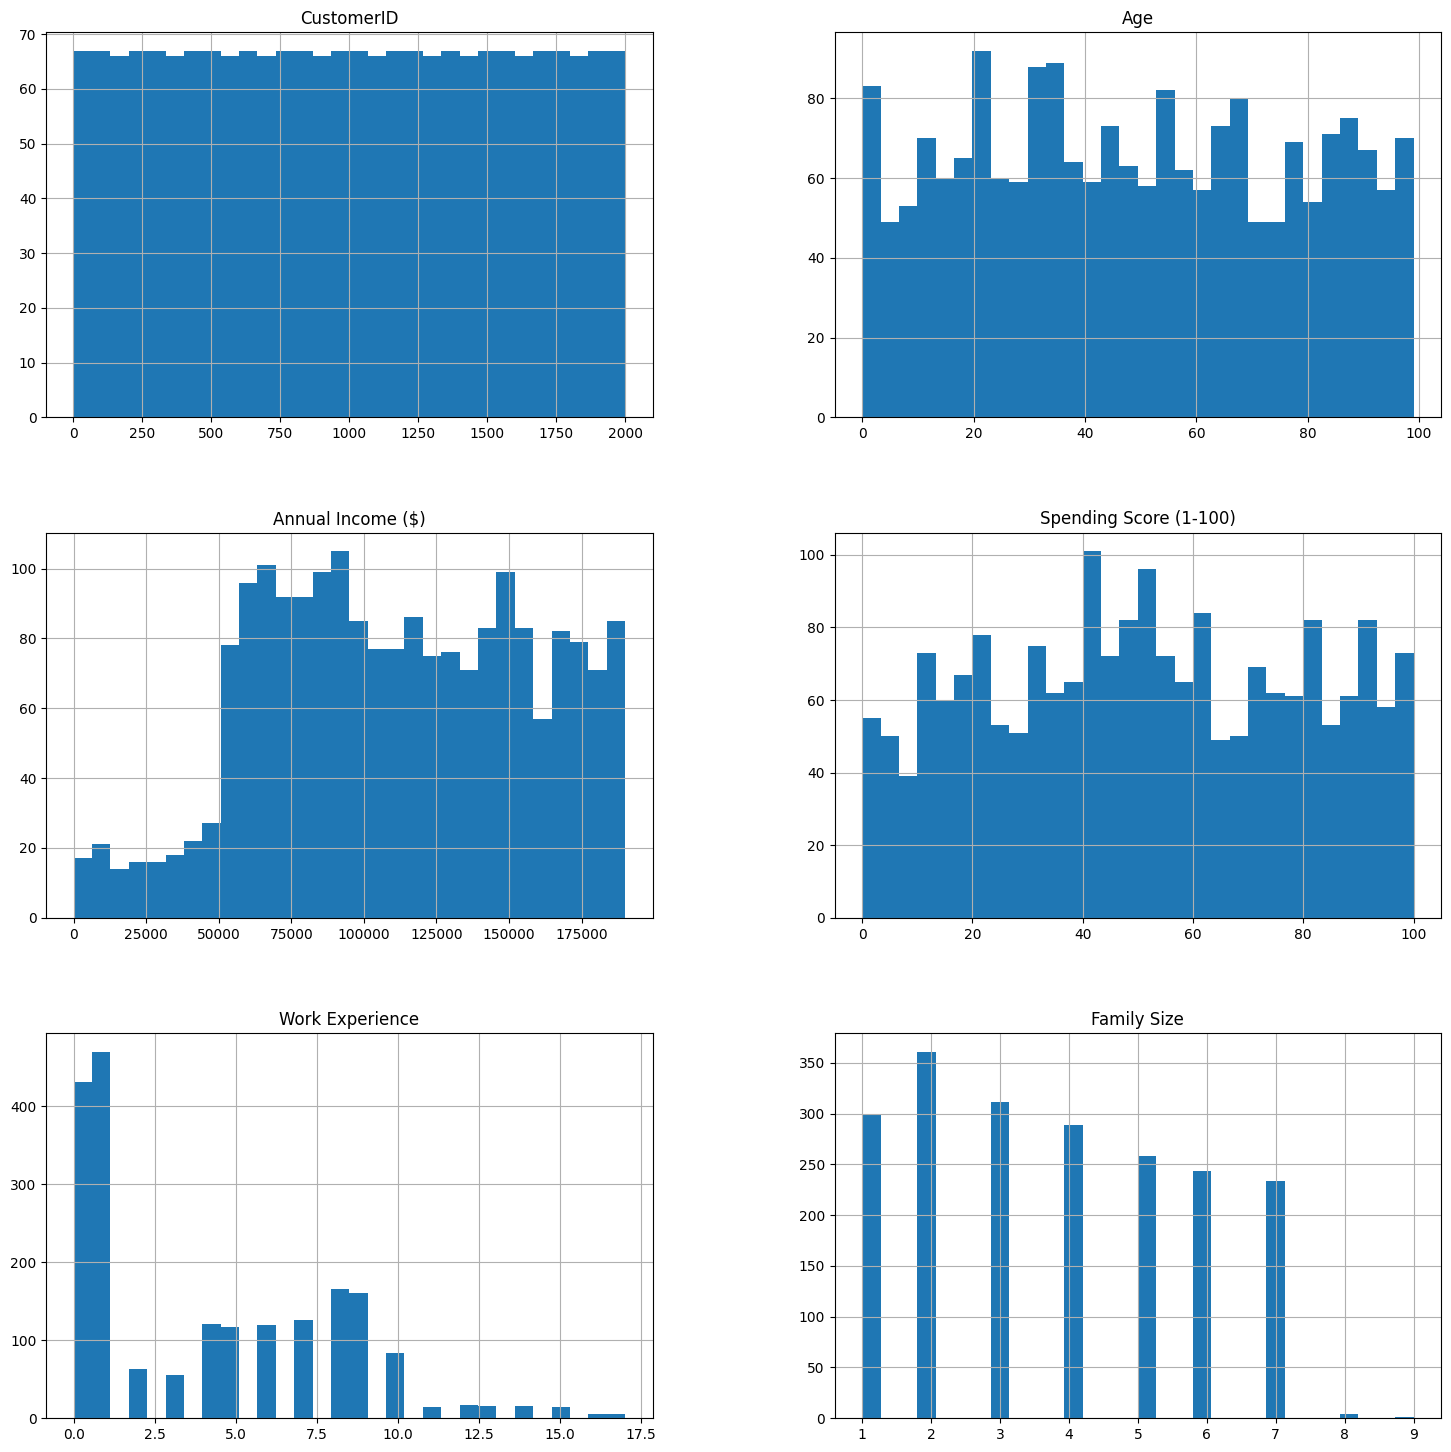

In [51]:
#3. Visualising data  distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

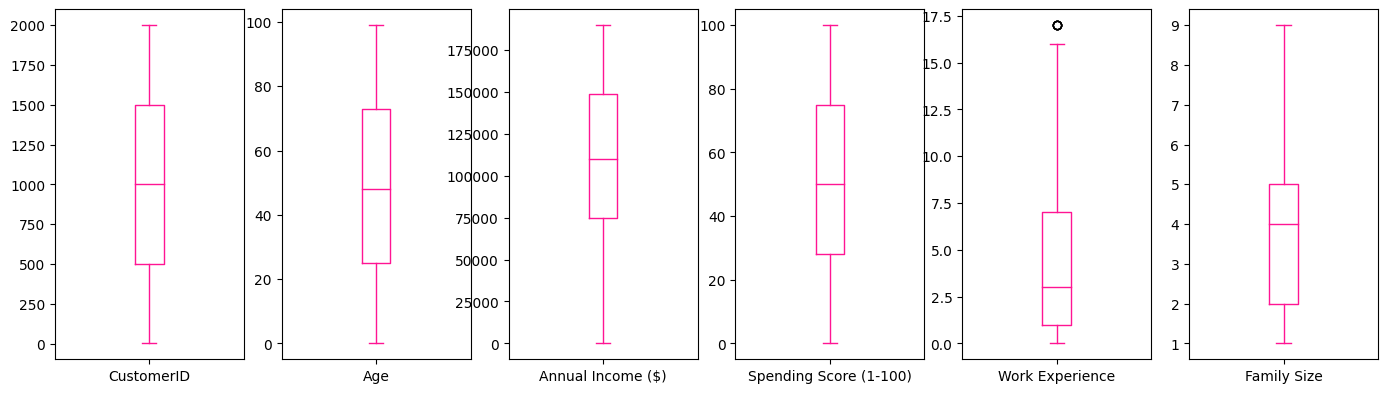

In [52]:
#detecting outliers
df.plot(kind='box', subplots=True, 
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');

under50  1007
over50  993


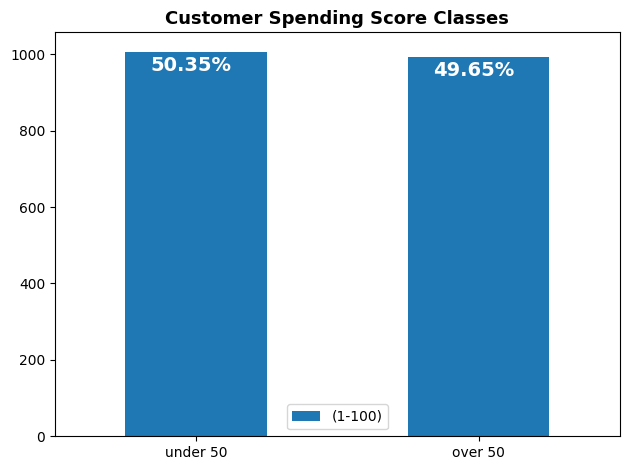

In [53]:
#checking target value distribution
under50 = df[df['Spending Score (1-100)'] <=50]
over50 = df[df['Spending Score (1-100)'] >50]
print('under50 ',len(under50['Spending Score (1-100)']))
print('over50 ',len(over50['Spending Score (1-100)']))

data = [len(under50['Spending Score (1-100)']),len(over50['Spending Score (1-100)'])]

name = ["under 50", "over 50"]
ax = pd.DataFrame(data,columns=['(1-100)']).plot(kind='bar')
ax.set_title("Customer Spending Score Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)


# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()


In [54]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [55]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Shop Customer EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
#Predictive Data Analytics Stage
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder


for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df.head(50)


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1.0,19,15000,39,5.0,1,4
1,2,1.0,21,35000,81,2.0,3,3
2,3,0.0,20,86000,6,2.0,1,1
3,4,0.0,23,59000,77,7.0,0,2
4,5,0.0,31,38000,40,3.0,2,6
5,6,0.0,22,58000,76,0.0,0,2
6,7,0.0,35,31000,6,5.0,1,3
7,8,0.0,23,84000,94,5.0,1,3
8,9,1.0,64,97000,3,2.0,0,3
9,10,0.0,30,98000,72,0.0,1,4


In [57]:
class_label = df['Spending Score (1-100)']
df = df.drop(['Spending Score (1-100)'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['Spending Score (1-100)']= class_label
df['Value Customer'] = (df['Spending Score (1-100)'] > 50).astype(int)
df

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100),Value Customer
0,0.000000,1.0,0.191919,0.078958,0.625,0.058824,0.375,39,0
1,0.000500,1.0,0.212121,0.184236,0.250,0.176471,0.250,81,1
2,0.001001,0.0,0.202020,0.452694,0.250,0.058824,0.000,6,0
3,0.001501,0.0,0.232323,0.310569,0.875,0.000000,0.125,77,1
4,0.002001,0.0,0.313131,0.200027,0.375,0.117647,0.625,40,0
...,...,...,...,...,...,...,...,...,...
1995,0.997999,0.0,0.717172,0.970591,0.000,0.470588,0.750,40,0
1996,0.998499,0.0,0.919192,0.385095,0.125,0.411765,0.750,32,0
1997,0.998999,1.0,0.878788,0.478808,0.625,0.529412,0.125,14,0
1998,0.999500,1.0,0.777778,0.958600,0.500,0.411765,0.125,4,0


In [58]:
#pre-processing
customer_data = df.copy()
le = preprocessing.LabelEncoder()
id = le.fit_transform(list(customer_data["CustomerID"])) #Identification
gender = le.fit_transform(list(customer_data["Gender"])) # gender (1 = male; 0 = female)
age = le.fit_transform(list(customer_data["Age"]))
annual_income = le.fit_transform(list(customer_data["Annual Income ($)"]))
profession = le.fit_transform(list(customer_data["Profession"])) # Proffesion of a customer
spending_score = le.fit_transform(list(customer_data["Spending Score (1-100)"])) # Score assigned by the shop, based on customer behavior and spending nature
work_experience = le.fit_transform(list(customer_data["Work Experience"])) # In years
family_size = le.fit_transform(list(customer_data["Family Size"])) #Family members of a customer
value_customer = le.fit_transform(list(customer_data["Value Customer"])) #customer spend more than 50 score

x = list(zip(gender, age, annual_income, work_experience, family_size))
y = list(value_customer)

In [59]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'


# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows


#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((1600, 5), (400, 5))

In [60]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
DT: 0.482500 (0.029948)

NB: 0.480000 (0.021342)

SVM: 0.510000 (0.031462)

GBM: 0.479375 (0.017298)

RF: 0.493750 (0.030104)



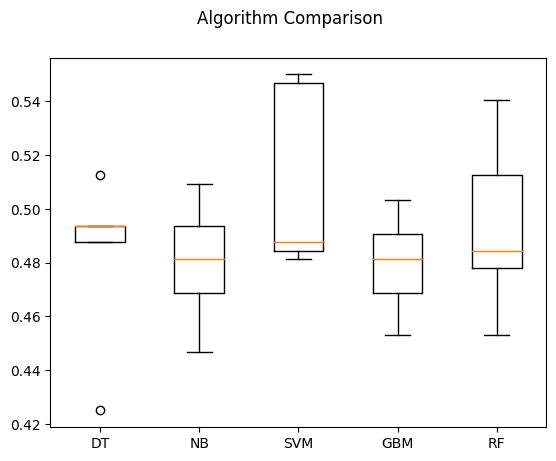

In [61]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [67]:
#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset


#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset


models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
svm = SVC()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()


best_model = rf
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.505


In [68]:
#Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       204
           1       0.49      0.48      0.49       196

    accuracy                           0.51       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.51      0.50       400



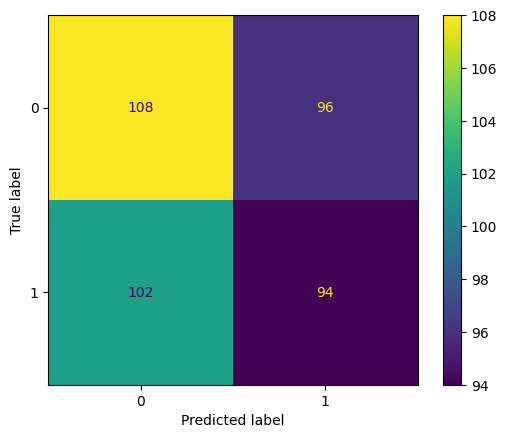

In [69]:
#Model Performance Evaluation Metric 2
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


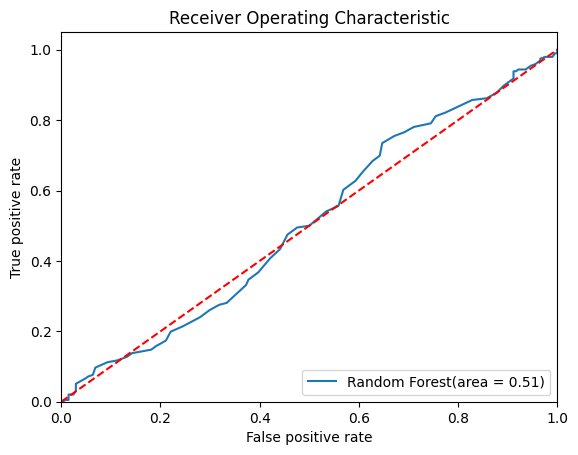

In [70]:
#Model Evaluation Metric 3- ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])


plt.figure()
plt.plot(fpr,tpr,label = 'Random Forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()


In [66]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)


Predicted:  0 Actual:  1 Data:  (1, 79, 242, 1, 6)
Predicted:  1 Actual:  0 Data:  (0, 22, 1457, 9, 4)
Predicted:  0 Actual:  1 Data:  (0, 62, 207, 0, 1)
Predicted:  0 Actual:  1 Data:  (0, 74, 581, 1, 3)
Predicted:  1 Actual:  0 Data:  (0, 61, 1153, 8, 3)
Predicted:  0 Actual:  0 Data:  (0, 33, 253, 0, 0)
Predicted:  1 Actual:  1 Data:  (0, 8, 1404, 9, 2)
Predicted:  0 Actual:  1 Data:  (1, 3, 361, 6, 0)
Predicted:  0 Actual:  1 Data:  (0, 69, 727, 4, 3)
Predicted:  0 Actual:  0 Data:  (0, 34, 498, 1, 1)
Predicted:  0 Actual:  0 Data:  (0, 57, 137, 1, 3)
Predicted:  1 Actual:  0 Data:  (1, 71, 1291, 4, 0)
Predicted:  1 Actual:  0 Data:  (0, 8, 1526, 7, 1)
Predicted:  0 Actual:  0 Data:  (0, 18, 95, 9, 4)
Predicted:  1 Actual:  1 Data:  (0, 62, 1092, 0, 3)
Predicted:  0 Actual:  0 Data:  (1, 52, 430, 1, 5)
Predicted:  1 Actual:  1 Data:  (1, 18, 1409, 0, 3)
Predicted:  1 Actual:  1 Data:  (1, 60, 1446, 1, 5)
Predicted:  0 Actual:  1 Data:  (0, 52, 308, 14, 2)
Predicted:  1 Actual:  1 D